#TASK 1

In [1]:
!pip install numpy matplotlib pillow librosa requests beautifulsoup4

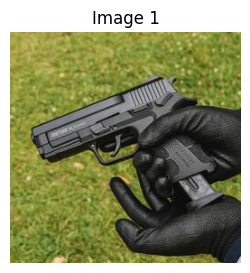

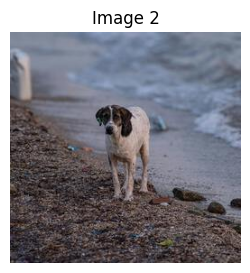

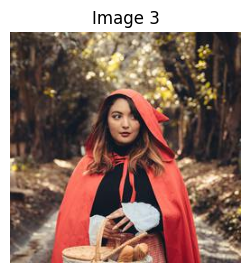

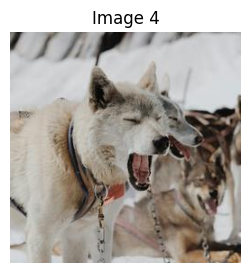

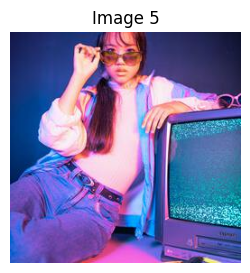

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

# Read images
image_files = glob.glob('images/*.jpg')[:5]  # Replace with your image directory and format
images = [Image.open(img).resize((256, 256)) for img in image_files]

# Display images
for idx, img in enumerate(images):
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.title(f'Image {idx+1}')
    plt.axis('off')
    plt.show()


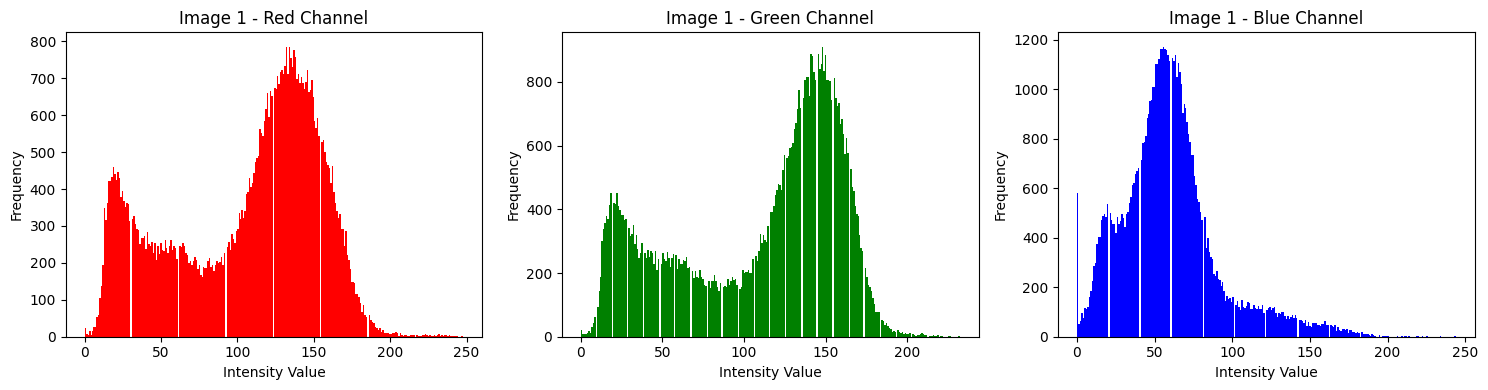

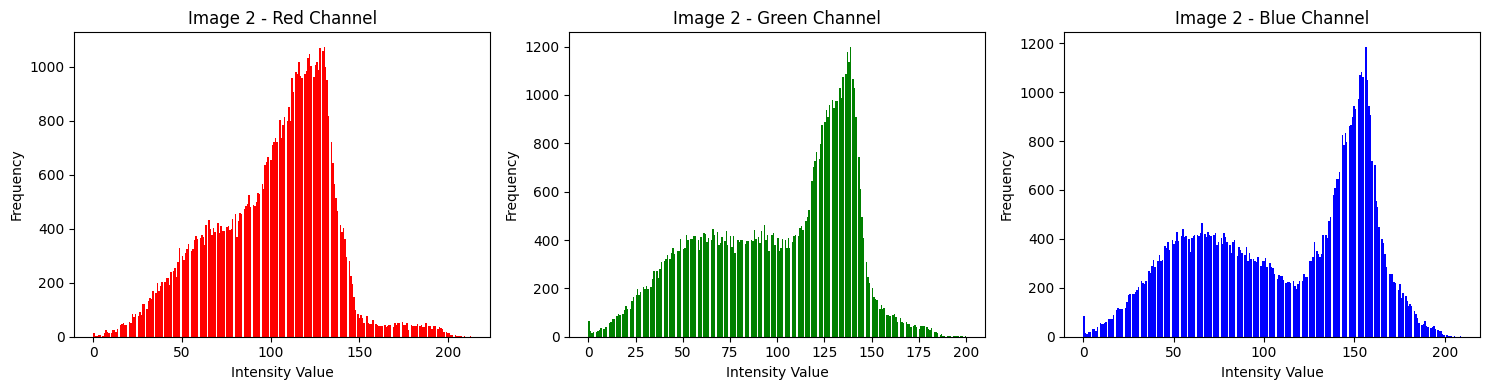

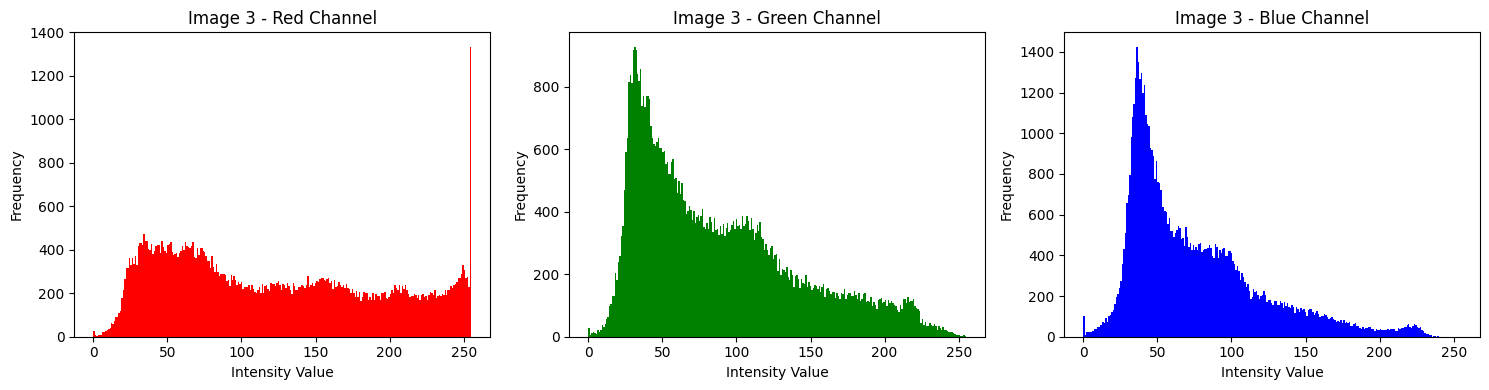

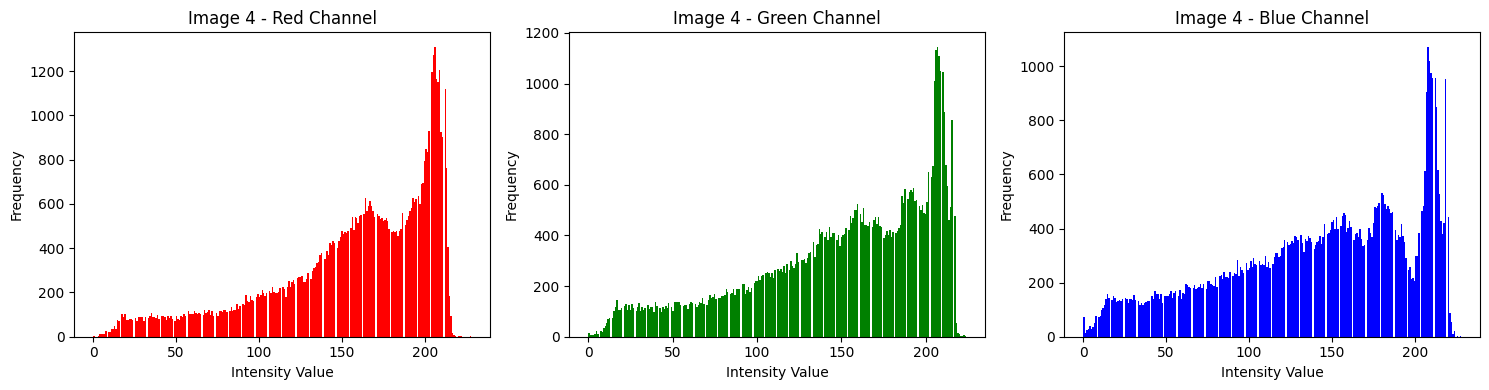

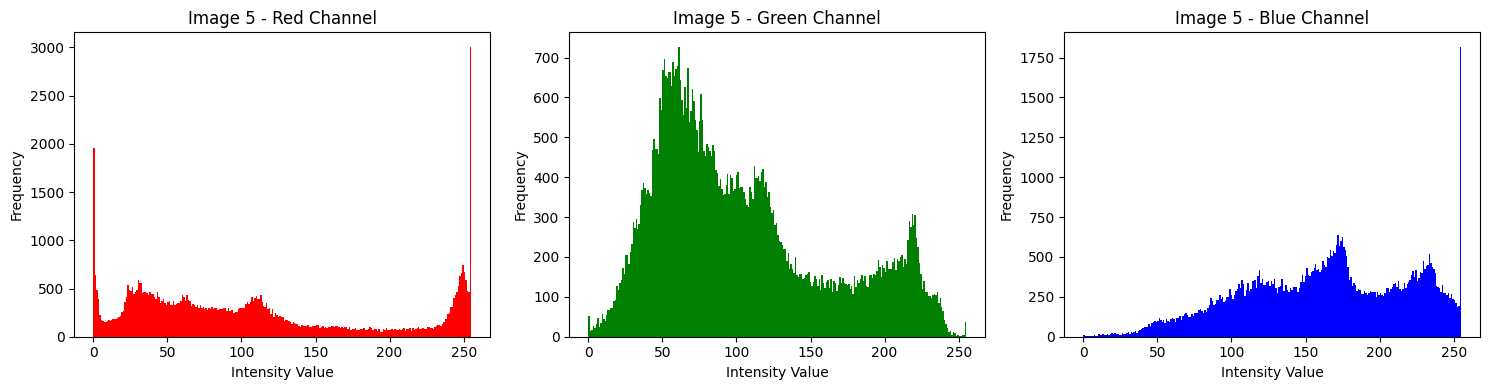

In [3]:
# Display histograms for R, G, B channels
for idx, img in enumerate(images):
    img_array = np.array(img)
    r_channel = img_array[:, :, 0].flatten()
    g_channel = img_array[:, :, 1].flatten()
    b_channel = img_array[:, :, 2].flatten()

    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    plt.hist(r_channel, bins=256, color='red')
    plt.title(f'Image {idx+1} - Red Channel')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(g_channel, bins=256, color='green')
    plt.title(f'Image {idx+1} - Green Channel')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(b_channel, bins=256, color='blue')
    plt.title(f'Image {idx+1} - Blue Channel')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


#TASK 2

In [4]:
normalized_images = []

for idx, img in enumerate(images):
    img_array = np.array(img, dtype=np.float32)

    # Compute mean and std per channel
    mean = img_array.mean(axis=(0, 1), keepdims=True)
    std = img_array.std(axis=(0, 1), keepdims=True)

    # Normalize image
    img_normalized = (img_array - mean) / std
    normalized_images.append(img_normalized)

    # Verify the mean and std
    norm_mean = img_normalized.mean(axis=(0, 1))
    norm_std = img_normalized.std(axis=(0, 1))

    print(f'Image {idx+1} - Normalized Mean per Channel: {norm_mean}')
    print(f'Image {idx+1} - Normalized Std per Channel: {norm_std}')


Image 1 - Normalized Mean per Channel: [ 2.7970418e-06 -8.4057665e-06 -9.6592703e-07]
Image 1 - Normalized Std per Channel: [0.99999505 1.0000228  0.9999908 ]
Image 2 - Normalized Mean per Channel: [-6.8854661e-07  3.8433509e-06 -1.3946337e-06]
Image 2 - Normalized Std per Channel: [1.0000193  1.0000161  0.99996847]
Image 3 - Normalized Mean per Channel: [ 3.8551825e-06 -9.1722086e-07 -6.1450737e-07]
Image 3 - Normalized Std per Channel: [1.0000219 1.0000513 1.0000023]
Image 4 - Normalized Mean per Channel: [3.2739299e-06 1.1146001e-05 4.2625907e-06]
Image 4 - Normalized Std per Channel: [1.0000002 0.9999612 1.0000306]
Image 5 - Normalized Mean per Channel: [-1.5839609e-05 -3.7407852e-07  2.3860121e-06]
Image 5 - Normalized Std per Channel: [1.000017  1.0000166 0.9999754]


#TASK 3

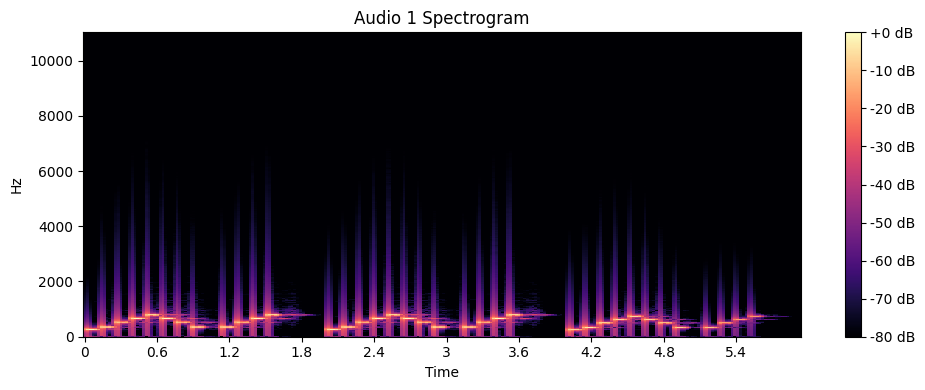

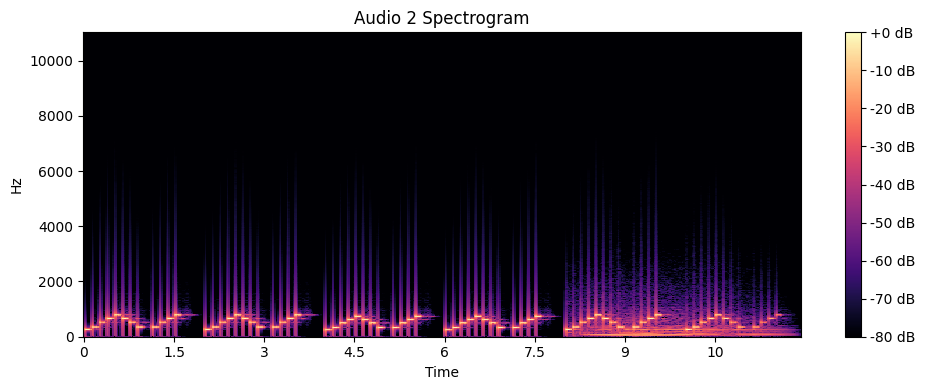

In [5]:
import librosa
import librosa.display

audio_files = ['audio/audio1.wav', 'audio/audio2.wav']  # Replace with your audio file paths

for idx, file in enumerate(audio_files):
    y, sr = librosa.load(file)
    plt.figure(figsize=(10, 4))
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Audio {idx+1} Spectrogram')
    plt.tight_layout()
    plt.show()


In [6]:
for idx, file in enumerate(audio_files):
    y, sr = librosa.load(file)
    S = np.abs(librosa.stft(y))

    # Flatten the spectrogram for mean and std calculation
    S_flat = S.flatten()

    mean = S_flat.mean()
    std = S_flat.std()

    # Normalize the spectrogram
    S_normalized = (S - mean) / std

    # Verify the mean and std
    norm_mean = S_normalized.mean()
    norm_std = S_normalized.std()

    print(f'Audio {idx+1} - Normalized Spectrogram Mean: {norm_mean}')
    print(f'Audio {idx+1} - Normalized Spectrogram Std: {norm_std}')


Audio 1 - Normalized Spectrogram Mean: 1.616594325071219e-08
Audio 1 - Normalized Spectrogram Std: 1.0
Audio 2 - Normalized Spectrogram Mean: 1.4828699157476422e-08
Audio 2 - Normalized Spectrogram Std: 1.000000238418579


#TASK 5

In [7]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter
import string

# Download the page content
url = 'http://smartlab.tmit.bme.hu/oktatas-deep-learning'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract and display the text content
text_content = soup.get_text(separator=' ', strip=True)
print(text_content)


Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT Languages Magyar English Menü be/kikapcsolás RÓLUNK Laborunkról Munkatársaink Média megjelenések MEGOLDÁSAINK Profivox magyar nyelvű felolvasó (korpuszos) Profivox magyar nyelvű felolvasó (DNN) Profivox magyar nyelvű felolvasó (HMM) Profivox magyar nyelvű felolvasó (diádos,triádos) StrokeAid Alkalmazások Jaws for Windows integráció Időjárás mindenkinek (magyar, Windows 8) AALFred (5 nyelven, Windows 8.1) Robobraille Beszélő ATM-ek Gyógyszervonal (OGYI) Árlista felolvasó (T-mobile) Keleti pályaudvar bemondórendszere Mindenség elmélete c. film gépi beszéd szinkron K+F Kutatási projektek (folyamatban) Kutatási projektek (befejezett) Publikációk (összes) Publikációk (kiemelt) Letölthető könyvek OKTATÁS KAPCSOLAT BLOG DEEP LEARNING A GYAKORLATBAN PYTHON ÉS LUA ALAPON Kezdőlap Oktatás Deep Learning Ha a tárgyról lecsúsztál, de szeretnél a deep learningbe belekezdeni, vagy már elvégezted a tárgyat és szeretnél e

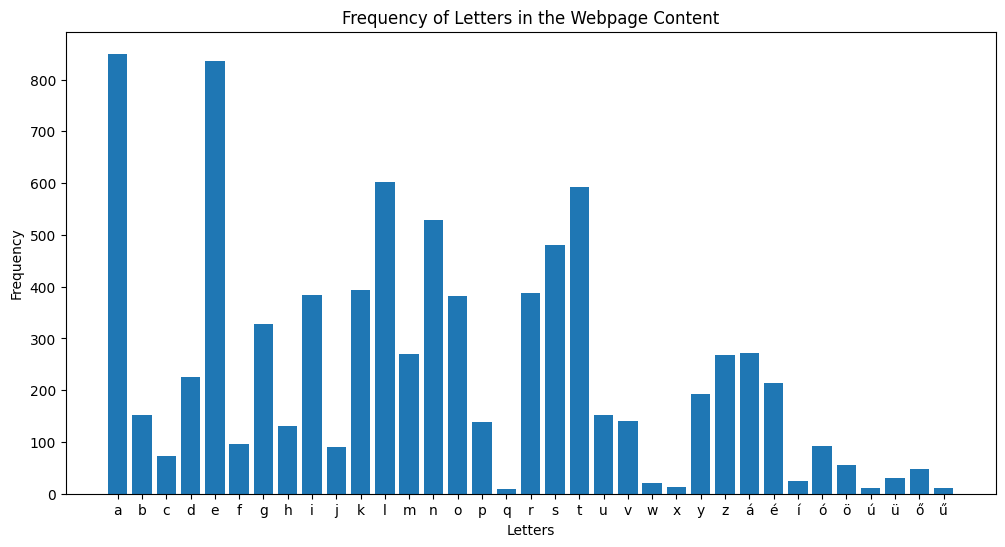

In [8]:
# Remove non-letter characters and convert to lowercase
text_letters = ''.join(filter(str.isalpha, text_content)).lower()

# Count the frequency of each letter
letter_counts = Counter(text_letters)

# Prepare data for plotting
letters = sorted(letter_counts.keys())
frequencies = [letter_counts[letter] for letter in letters]

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(letters, frequencies)
plt.title('Frequency of Letters in the Webpage Content')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.show()
